In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
df = pd.read_csv('data/Train.zip')

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.saledate = pd.to_datetime(df.saledate)

In [5]:
data_dic = pd.read_excel('data/Data Dictionary.xlsx')

In [6]:
df.columns = [col.strip().lower() for col in df.columns]

In [7]:
def get_info(row_name):
    
    print(row_name + ': ' +data_dic[data_dic['Variable'] == row_name]['Description'].values[0])


In [8]:
def find_na_percent(df, column_name):
#     return 'Percent of missing NA: {}'.format(len(df[df[column_name].isnull()]) / len(df) * 100)
      return float(len(df[df[column_name].isnull()]) / len(df) * 100)

In [9]:
def find_baseline_columns():
    k = []
    for i in df.columns:
        lst = find_na_percent(df, i)
        if lst == 0.0:
            k.append(i)
    return k   

In [10]:
get_info('SalesID')

SalesID:   unique identifier of a particular sale of a machine at auction


In [11]:
find_na_percent(df, 'backhoe_mounting')

80.38716110937986

In [12]:
col_names = find_baseline_columns()

In [13]:
df_base = df[col_names]
df_base.head()

,salesid,saleprice,machineid,modelid,datasource,yearmade,saledate,fimodeldesc,fibasemodel,fiproductclassdesc,state,productgroup,productgroupdesc
0,1139246,66000,999089,3157,121,2004,2006-11-16,521D,521,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader
1,1139248,57000,117657,77,121,1996,2004-03-26,950FII,950,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader
2,1139249,10000,434808,7009,121,2001,2004-02-26,226,226,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders
3,1139251,38500,1026470,332,121,2001,2011-05-19,PC120-6E,PC120,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators
4,1139253,11000,1057373,17311,121,2007,2009-07-23,S175,S175,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders


In [14]:
df_base.corr()['saleprice']

salesid       0.010725
saleprice     1.000000
machineid    -0.224854
modelid      -0.042125
datasource    0.015122
yearmade      0.156453
Name: saleprice, dtype: float64

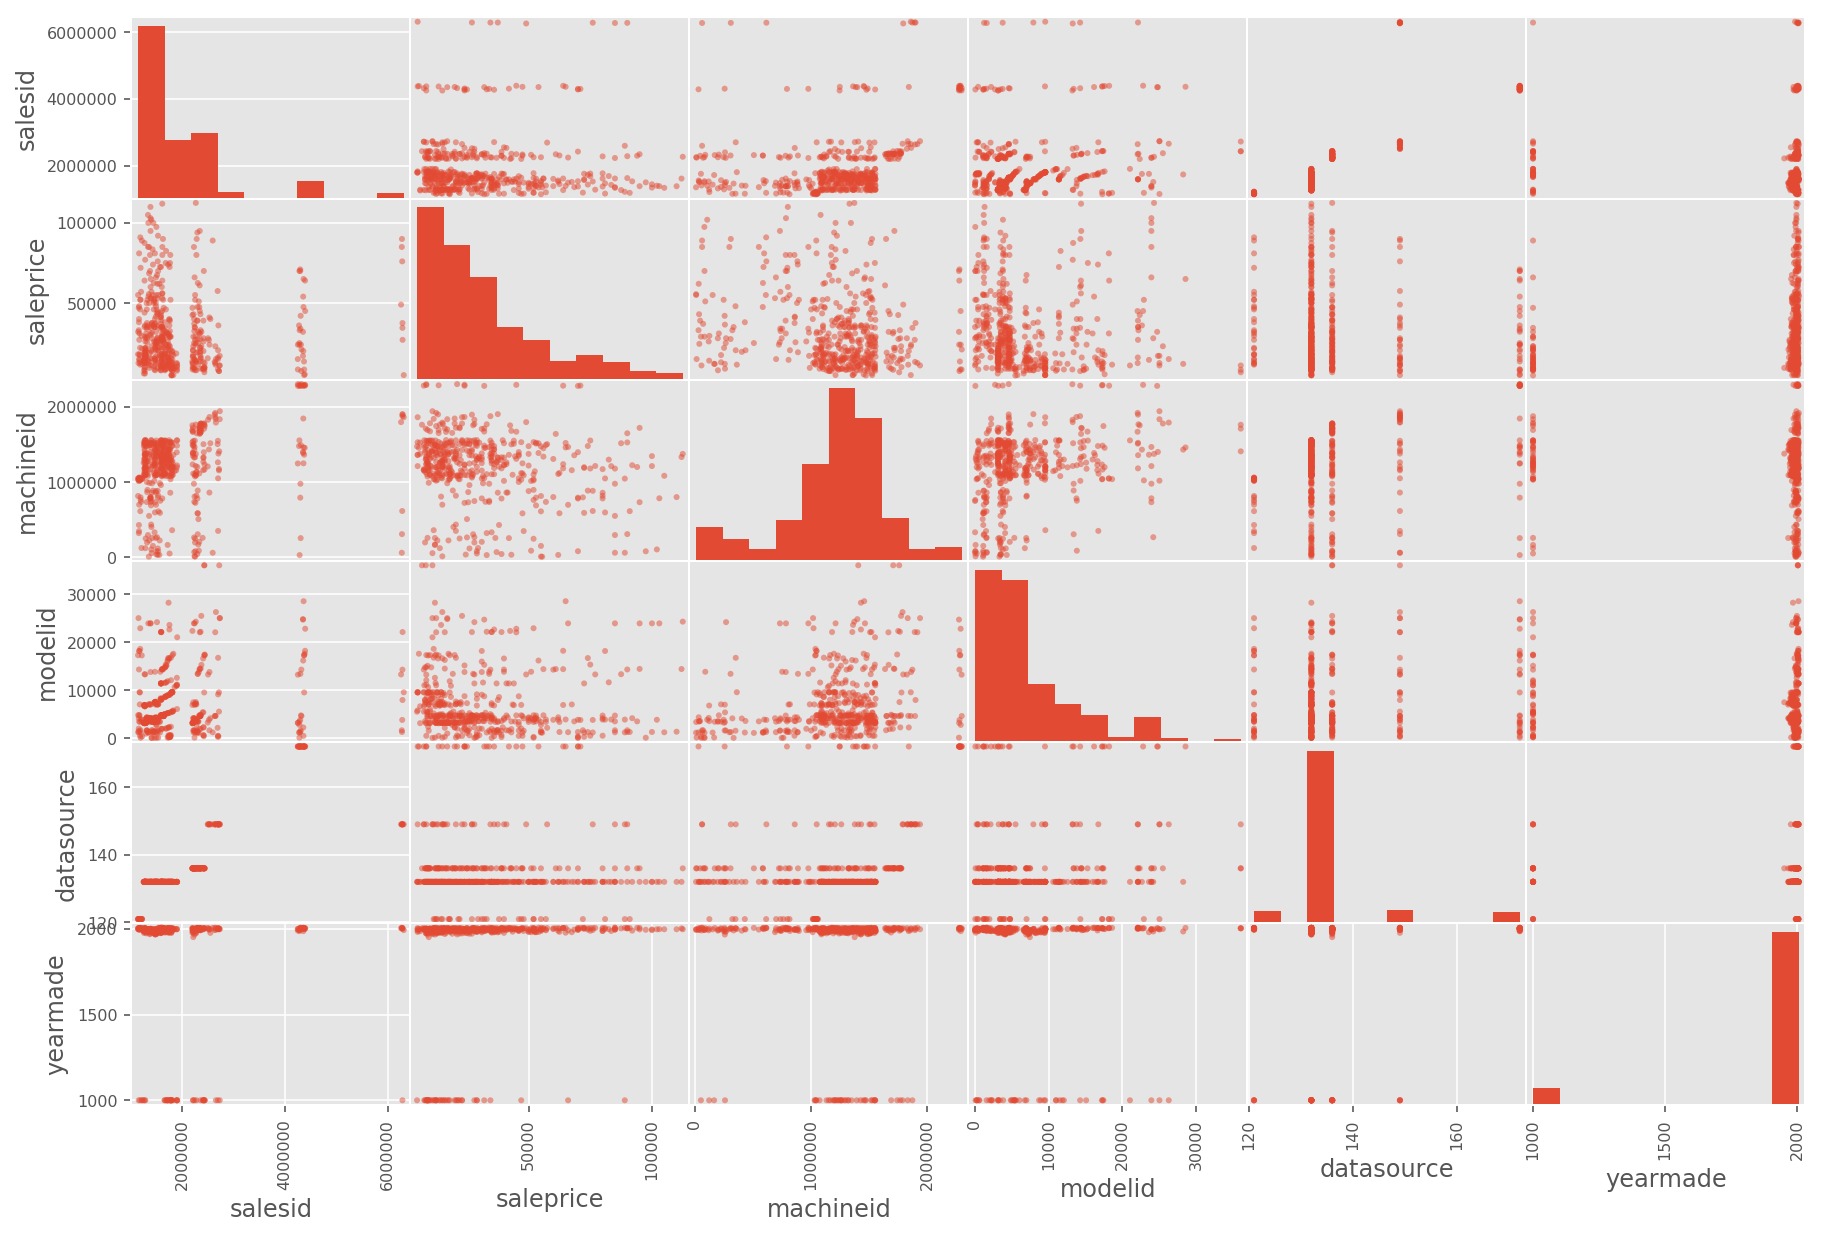

In [15]:
figure = figsize(15,10)
pd.plotting.scatter_matrix(df_base.sample(500));

In [16]:
top_pos_corr = df.corr()['saleprice'].sort_values(ascending = False)[:6]
top_neg_corr = df.corr()['saleprice'].sort_values()[:5]

In [17]:
top_pos_corr[1:]

yearmade                    0.156453
datasource                  0.015122
machinehourscurrentmeter    0.013560
salesid                     0.010725
modelid                    -0.042125
Name: saleprice, dtype: float64

In [18]:
top_neg_corr

machineid                  -0.224854
auctioneerid               -0.046865
modelid                    -0.042125
salesid                     0.010725
machinehourscurrentmeter    0.013560
Name: saleprice, dtype: float64

In [19]:
num_cols = df._get_numeric_data().columns

In [20]:
cat_cols = set(df.columns) - set(num_cols)

In [21]:
df_cat_cols = df[list(cat_cols)]

In [22]:
df_cat_cols.head(3)

,fimodeldesc,fisecondarydesc,pattern_changer,turbocharged,track_type,stick_length,fimodelseries,travel_controls,differential_type,tip_control,...,drive_system,ride_control,hydraulics,saledate,blade_width,stick,state,forks,fiproductclassdesc,pad_type
0,521D,D,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,...,NaN,None or Unspecified,2 Valve,2006-11-16,NaN,NaN,Alabama,None or Unspecified,Wheel Loader - 110.0 to 120.0 Horsepower,NaN
1,950FII,F,NaN,NaN,NaN,NaN,II,NaN,Standard,NaN,...,NaN,None or Unspecified,2 Valve,2004-03-26,NaN,NaN,North Carolina,None or Unspecified,Wheel Loader - 150.0 to 175.0 Horsepower,NaN
2,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Auxiliary,2004-02-26,NaN,NaN,New York,None or Unspecified,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,NaN


In [251]:
df_num_cols = df[num_cols]

In [23]:
df_tex = df[df.productgroup == 'TEX']
df_ttt = df[df.productgroup == 'TTT']
df_bl = df[df.productgroup == 'BL']
df_wl = df[df.productgroup == 'WL']
df_SSL = df[df.productgroup == 'SSL']
df_MG = df[df.productgroup == 'MG']

In [24]:
df_tex.isnull().sum()

salesid                          0
saleprice                        0
machineid                        0
modelid                          0
datasource                       0
auctioneerid                  6051
yearmade                         0
machinehourscurrentmeter     64859
usageband                    81275
saledate                         0
fimodeldesc                      0
fibasemodel                      0
fisecondarydesc              58055
fimodelseries                79749
fimodeldescriptor            59065
productsize                    155
fiproductclassdesc               0
state                            0
productgroup                     0
productgroupdesc                 0
drive_system                101167
enclosure                      115
forks                       101167
pad_type                    101167
ride_control                101167
stick                       101167
transmission                101167
turbocharged                101167
blade_extension     

In [25]:
df_tex.dropna(1, how = 'all', inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_tex.isnull().sum()

salesid                         0
saleprice                       0
machineid                       0
modelid                         0
datasource                      0
auctioneerid                 6051
yearmade                        0
machinehourscurrentmeter    64859
usageband                   81275
saledate                        0
fimodeldesc                     0
fibasemodel                     0
fisecondarydesc             58055
fimodelseries               79749
fimodeldescriptor           59065
productsize                   155
fiproductclassdesc              0
state                           0
productgroup                    0
productgroupdesc                0
enclosure                     115
hydraulics                    400
coupler                      1074
track_type                   2014
undercarriage_pad_width      1295
stick_length                 1949
thumb                        1879
pattern_changer              1949
grouser_type                 2014
dtype: int64

In [27]:
df_tex.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)

/Users/Haebichan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_tex = df_tex[df_tex.enclosure != 'None or Unspecified']
df_tex = df_tex[df_tex.hydraulics != 'None or Unspecified']

In [29]:
df_tex.enclosure.dropna(inplace = True)

In [30]:
df_tex.hydraulics.dropna(inplace = True)

In [134]:
df_tex.productsize.dropna(inplace = True)

In [135]:
# df_tex = df_tex[df_tex.enclosure.notnull()]

In [136]:
df_tex['grouser_type'].value_counts(1)

Double    0.853761
Triple    0.146218
Single    0.000020
Name: grouser_type, dtype: float64

In [137]:
# pd.plotting.scatter_matrix(df_tex.sample(1000));

In [139]:
get_info('ProductSize')

ProductSize:   Don't know what this is 


In [143]:
tex_top_pos_corr = df_tex.corr()['saleprice'].sort_values(ascending = False)[:6]
tex_top_neg_corr = df_tex.corr()['saleprice'].sort_values()[:5]

In [144]:
tex_top_pos_corr[1:]

productsize                 0.564226
yearmade                    0.232266
datasource                  0.036061
salesid                     0.018744
machinehourscurrentmeter    0.002795
Name: saleprice, dtype: float64

In [145]:
tex_top_neg_corr

machineid                  -0.182397
modelid                    -0.123807
auctioneerid               -0.017997
machinehourscurrentmeter    0.002795
salesid                     0.018744
Name: saleprice, dtype: float64

In [146]:
# df_tex = df[df.productgroup == 'TEX']
# df_tex.dropna(1, how = 'all', inplace = True)
# df_tex.drop(['fisecondarydesc', 'fimodelseries', 'fimodeldescriptor'], 1, inplace = True)
# df_tex = df_tex[df_tex.enclosure != 'None or Unspecified']
# df_tex = df_tex[df_tex.hydraulics != 'None or Unspecified']
# df_tex.enclosure.dropna(inplace = True)
# df_tex.hydraulics.dropna(inplace = True)
# df_tex = df_tex[df_tex.enclosure.notnull()]

0

In [149]:
df_tex.hydraulics.value_counts(1)

Standard             0.735042
Auxiliary            0.250737
2 Valve              0.012822
Base + 1 Function    0.000913
3 Valve              0.000486
Name: hydraulics, dtype: float64

In [163]:
dummy_grouser = pd.get_dummies(df_tex['grouser_type'])
dummy_grouser.drop(['Triple', 'Single'], 1, inplace=True)
dummy_track = pd.get_dummies(df_tex['track_type'], drop_first=True)
dummy_hydr = pd.get_dummies(df_tex['hydraulics'], sparse = True)
dummy_hydr.drop(['Base + 1 Function', '2 Valve', '3 Valve', 'Auxiliary'], 1, inplace=True)
dummy_enclosure = pd.get_dummies(df_tex['enclosure'])
dummy_enclosure.drop(['OROPS', 'EROPS w AC'], 1, inplace=True)

dummy_thumb = pd.get_dummies(df_tex['thumb'])
dummy_thumb.drop(['None or Unspecified'],1, inplace = True)

In [208]:
df_tex.productsize.replace(['Large / Medium', 'Small', 'Mini'], [2,1,0], inplace = True)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

EROPS         65155
EROPS w AC    35460
OROPS           428
EROPS AC          3
Name: enclosure, dtype: int64

In [234]:
dummy_grouser2 = pd.get_dummies(df_tex['grouser_type'])
dummy_grouser2.drop(['Double', 'Single'], 1, inplace=True)
dummy_track2 = pd.get_dummies(df_tex['track_type'], drop_first=True)
dummy_hydr2 = pd.get_dummies(df_tex['hydraulics'], sparse = True)
dummy_hydr2.drop(['Standard','Base + 1 Function', '3 Valve'], 1, inplace=True)
dummy_enclosure2 = pd.get_dummies(df_tex['enclosure'])
dummy_enclosure2.drop(['EROPS'], 1, inplace=True)

dummy_thumb2 = pd.get_dummies(df_tex['thumb'])
dummy_thumb2.drop(['None or Unspecified'],1, inplace = True)

In [235]:
df_tex_dummy = pd.concat([dummy_grouser,dummy_track,dummy_hydr,dummy_enclosure, dummy_thumb, df_tex['productsize']],1, join = 'inner')

In [236]:
df_tex_dummy = df_tex_dummy[df_tex_dummy.productsize.notnull()]

In [237]:
df_tex_dummy2 = pd.concat([dummy_grouser2,dummy_track2,dummy_hydr2,dummy_enclosure2, df_tex['productsize']],1, join = 'inner')

In [238]:
df_tex_model1 = df_tex_dummy.join(df_tex['saleprice'])

In [239]:
df_tex_model2 = df_tex_dummy2.join(df_tex['saleprice'])

In [240]:
df_tex_model1.isnull().sum()

Double         0
Steel          0
Standard       0
EROPS          0
EROPS AC       0
Hydraulic      0
Manual         0
productsize    0
saleprice      0
dtype: int64

In [241]:
from sklearn.linear_model import *
from sklearn.model_selection import *
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.metrics import *

In [242]:
X = sm.add_constant(df_tex_model1.iloc[:,:-1])
y = np.log(df_tex_model1.iloc[:,-1:])


In [243]:
model = OLS(y, X).fit()

In [244]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.370e+04
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:16:45   Log-Likelihood:                -70494.
No. Observations:              100609   AIC:                         1.410e+05
Df Residuals:                  100601   BIC:                         1.411e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9281      0.006   1584.786      0.000       9.916       9.940
Double         -0.0533      0.004    -12.540      0.000      -0.062      -0.045
Steel           0.1605      0.005     30.641      0.000       0.150       0.171
Standard        0.0010      0.004      0.264      0.792      -0.006       0.008
EROPS          -0.4236      0.003   -124.620      0.000      -0.430      -0.417
EROPS AC     1.278e-16   1.93e-17      6.618      0.000    8.99e-17    1.66e-16
Hydraulic       0.0820      0.006     13.231      0.000       0.070       0.094
Manual          0.0218      0.005      4.073      0.000       0.011       0.032
productsize     0.4079      0.002    175.773      0.000       0.403       0.412
==============================================================================
Omnibus:                      998.578   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.646
Skew:                          -0.245   Prob(JB):                    4.29e-224
Kurtosis:                       3.072   Cond. No.                     9.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [248]:
X2 = sm.add_constant(df_tex_model2.iloc[:,:-1])
y2 = np.log(df_tex_model2.iloc[:,-1:])


model = OLS(y2,X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:18:22   Log-Likelihood:                -70423.
No. Observations:              100609   AIC:                         1.409e+05
Df Residuals:                  100601   BIC:                         1.409e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.4683      0.004   2105.720      0.000       9.460       9.477
Triple          0.0761      0.004     17.113      0.000       0.067       0.085
Steel           0.1360      0.005     24.868      0.000       0.125       0.147
2 Valve        -0.0587      0.016     -3.677      0.000      -0.090      -0.027
Auxiliary       0.0111      0.004      2.986      0.003       0.004       0.018
EROPS AC     5.073e-16   7.26e-18     69.851      0.000    4.93e-16    5.22e-16
EROPS w AC      0.4316      0.003    127.045      0.000       0.425       0.438
OROPS           0.1353      0.029      4.703      0.000       0.079       0.192
productsize     0.4124      0.002    176.179      0.000       0.408       0.417
==============================================================================
Omnibus:                      954.529   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.298
Skew:                          -0.239   Prob(JB):                    4.97e-214
Kurtosis:                       3.079   Cond. No.                     3.90e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

NameError: name 'df_num_cols' is not defined

In [246]:
df_tex_model1.iloc[:,1:].corr()['saleprice']

Steel          0.336410
Standard       0.072725
EROPS         -0.437803
EROPS AC            NaN
Hydraulic      0.027628
Manual         0.049122
productsize    0.564357
saleprice      1.000000
Name: saleprice, dtype: float64

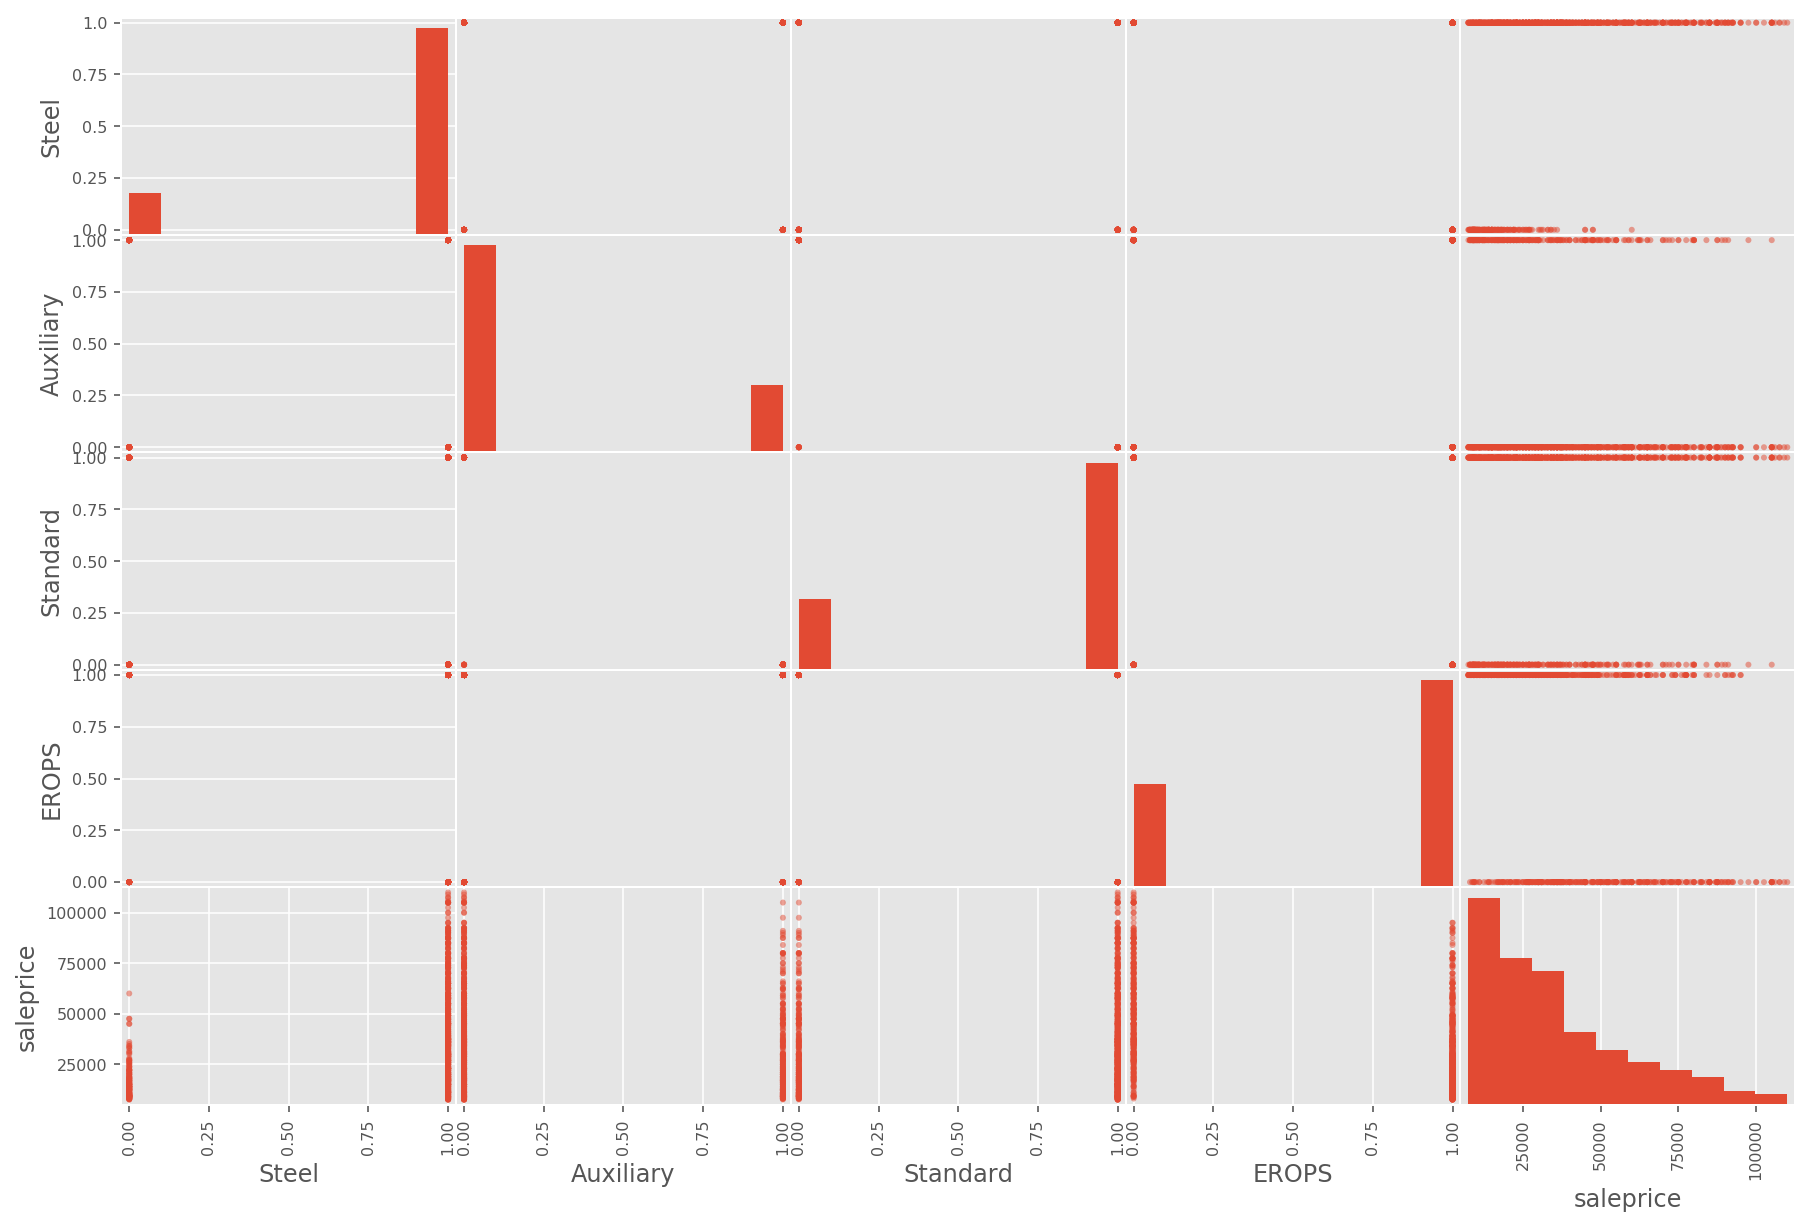

In [277]:
pd.plotting.scatter_matrix(df_tex_model1.iloc[:,1:].sample(1000));

In [278]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)


haebichan = LinearRegression()

haebichan.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [280]:
y_pred = haebichan.predict(x_test)

,const,Double,Steel,Auxiliary,Standard,EROPS
151507,1.0,1,1,0,1,1
94765,1.0,0,1,0,1,1
366132,1.0,1,1,0,1,1
68834,1.0,1,1,0,1,1
12115,1.0,1,1,1,0,0
246728,1.0,1,1,0,1,0
248193,1.0,1,1,0,1,1
281666,1.0,1,0,1,0,1
284676,1.0,1,1,1,0,1
230004,1.0,1,1,0,1,1


In [292]:
pd.concat([dummy_grouser,dummy_track, dummy_hydr, dummy_enclosure], axis = 1)

,Double,Steel,Auxiliary,Standard,EROPS
3,0,0,0,0,0
6,1,1,0,1,1
8,1,0,1,0,1
12,1,1,1,0,1
16,1,0,1,0,1
17,1,1,1,0,1
18,1,0,1,0,1
20,1,1,0,1,0
22,1,0,1,0,0
26,1,0,1,0,1


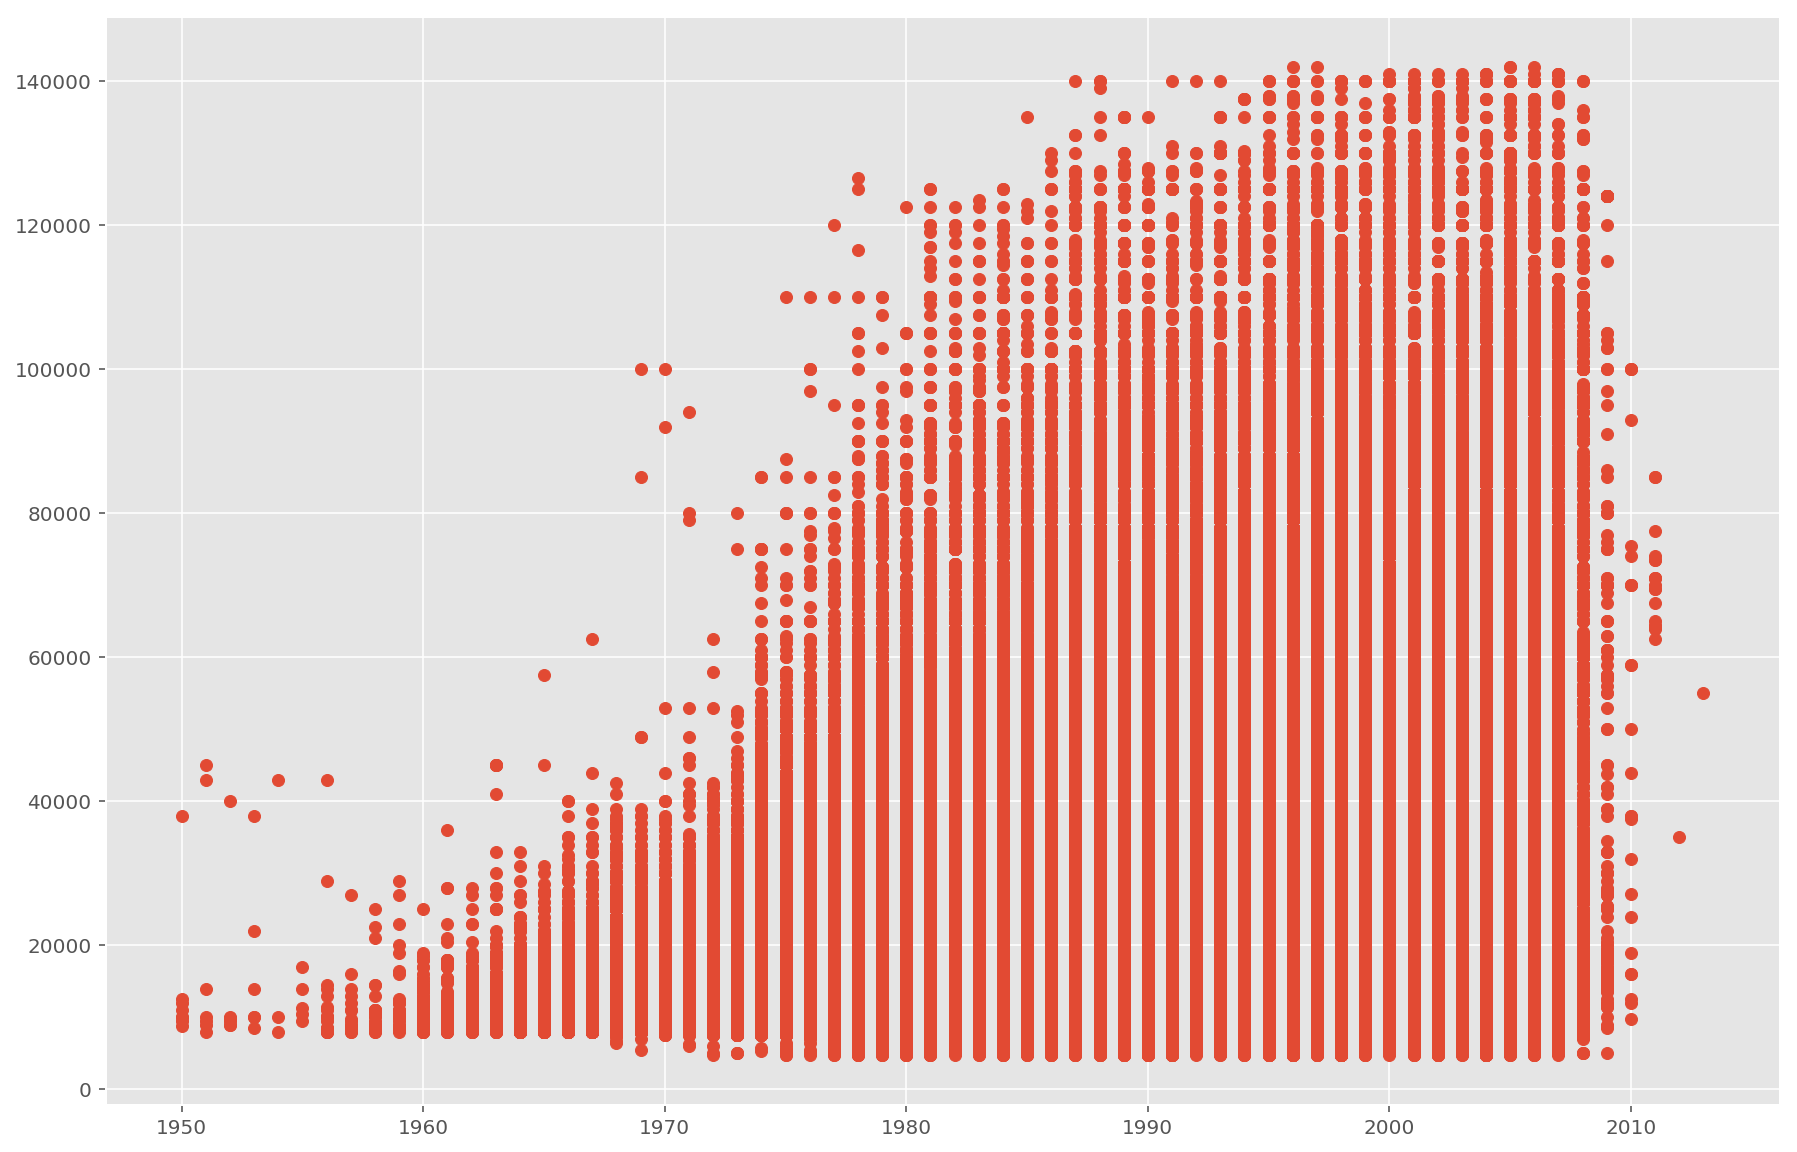

In [276]:
df2 = df[df['yearmade'] != 1000]
df2 = df2[df2['yearmade'] >= 1950]


scatter(df2['yearmade'], df2['saleprice']);



In [277]:
df2.corr()['saleprice']

salesid                     0.011715
saleprice                   1.000000
machineid                  -0.220755
modelid                    -0.031199
datasource                  0.009267
auctioneerid               -0.043810
yearmade                    0.219446
machinehourscurrentmeter    0.014120
Name: saleprice, dtype: float64